In [79]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_csv('/content/train.csv')

In [81]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [83]:
df.interpolate(method = 'linear', inplace = True)

In [84]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [85]:
columns = df.columns.tolist()
print(columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

# **Preparation of data for classification**

In [86]:
classification_df = df[['OverallQual', 'OverallCond', 'LotFrontage', 'LotArea', 'GarageArea', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']]

In [87]:
classification_df.head()

,OverallQual,OverallCond,LotFrontage,LotArea,GarageArea,TotalBsmtSF,GrLivArea,SalePrice
0,7,5,65.0,8450,548,856,1710,208500
1,6,8,80.0,9600,460,1262,1262,181500
2,7,5,68.0,11250,608,920,1786,223500
3,7,5,60.0,9550,642,756,1717,140000
4,8,5,84.0,14260,836,1145,2198,250000


In [88]:
def map_values(value):
    if value in [1, 2, 3, 4, 5]:
        return 0
    elif value in [6, 7, 8, 9,10]:
        return 1
    else:
        return None

In [89]:
classification_df['OverallQual'] = classification_df['OverallQual'].apply(map_values)

<ipython-input-89-f9121faf0008>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['OverallQual'] = classification_df['OverallQual'].apply(map_values)


In [90]:
classification_df.head(10)

,OverallQual,OverallCond,LotFrontage,LotArea,GarageArea,TotalBsmtSF,GrLivArea,SalePrice
0,1,5,65.0,8450,548,856,1710,208500
1,1,8,80.0,9600,460,1262,1262,181500
2,1,5,68.0,11250,608,920,1786,223500
3,1,5,60.0,9550,642,756,1717,140000
4,1,5,84.0,14260,836,1145,2198,250000
5,0,5,85.0,14115,480,796,1362,143000
6,1,5,75.0,10084,636,1686,1694,307000
7,1,6,63.0,10382,484,1107,2090,200000
8,1,5,51.0,6120,468,952,1774,129900
9,0,6,50.0,7420,205,991,1077,118000


# **Random Forest Classification using sklearn**

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,log_loss,roc_auc_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
X = classification_df[['OverallCond', 'LotFrontage', 'LotArea', 'GarageArea', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']]
y = classification_df['OverallQual']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0
 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1
 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0]


In [96]:
#evaluation matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, model.predict_proba(X_test))


print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('roc_auc: ', roc_auc)
print('logloss', logloss)


accuracy:  0.8664383561643836
precision:  0.8963414634146342
recall:  0.8698224852071006
f1:  0.882882882882883
roc_auc:  0.8658055515466397
logloss 0.32775506724610126


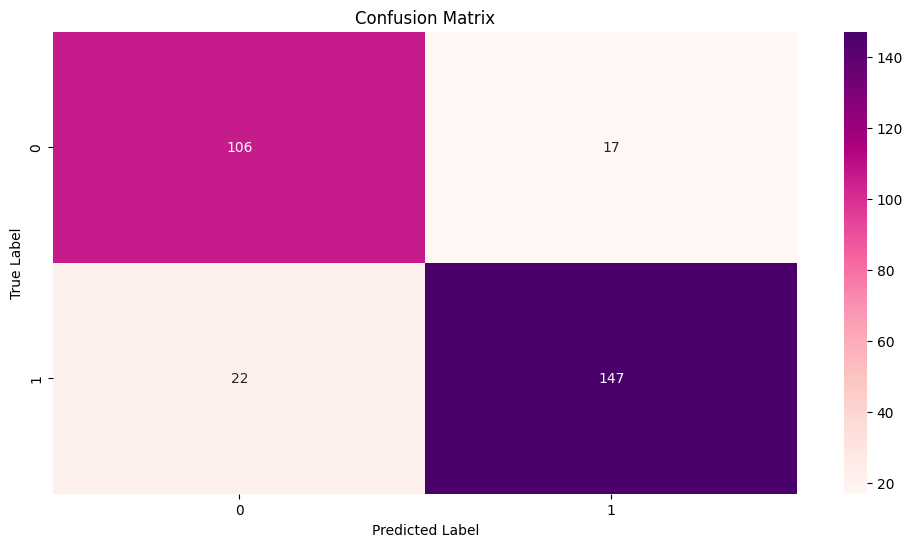

In [97]:
classifier_matrix = confusion_matrix(y_test,y_pred)
class_label = np.unique(y_test)

plt.figure(figsize=(12,6))
sns.heatmap(classifier_matrix, annot=True, cmap='RdPu', fmt='d', xticklabels=class_label, yticklabels=class_label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Random Forest Classification from scratch**

In [98]:
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

In [99]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

class RandomForest:

    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split, max_depth=self.max_depth)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)


In [100]:
X2 = classification_df[['OverallCond','LotFrontage', 'LotArea','GarageArea','TotalBsmtSF','GrLivArea','SalePrice']]
y2 = classification_df['OverallQual']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,random_state=42)

In [101]:
X2_train = X2_train.values
y2_train = y2_train.values
X2_test = X2_test.values

In [102]:
model = RandomForest(n_trees = 3)

model.fit(X2_train, y2_train)

In [103]:
y2_pred = model.predict(X2_test)
print(y2_pred)

[0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1
 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1
 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0]


In [104]:
#evaluation matrix

accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred)
recall = recall_score(y2_test, y2_pred)
f1 = f1_score(y2_test, y2_pred)
roc_auc = roc_auc_score(y2_test, y2_pred)


print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('roc_auc: ', roc_auc)



accuracy:  0.797945205479452
precision:  0.7989130434782609
recall:  0.8698224852071006
f1:  0.8328611898016997
roc_auc:  0.7845047385385097


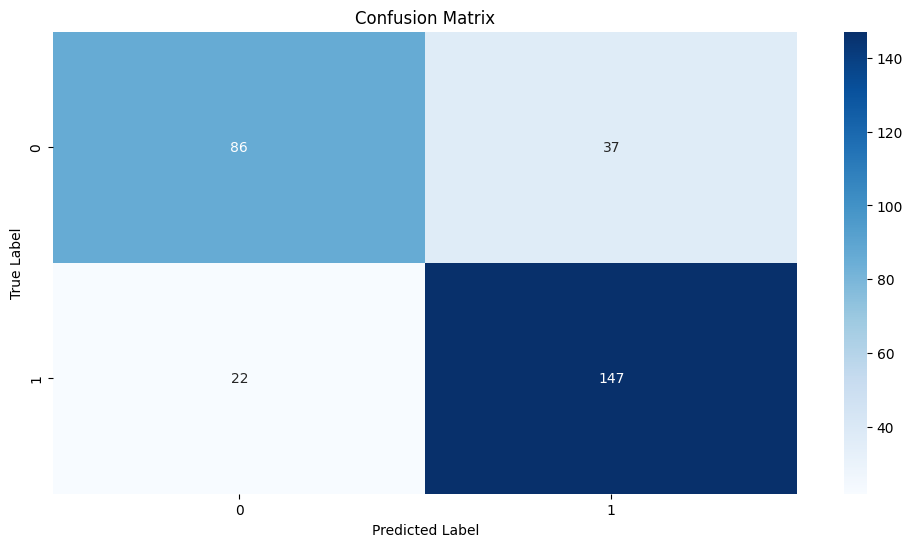

In [105]:
classifier_matrix1 = confusion_matrix(y2_test,y2_pred)
class_label = np.unique(y2_test)

plt.figure(figsize=(12,6))
sns.heatmap(classifier_matrix1, annot=True, cmap='Blues', fmt='d', xticklabels=class_label, yticklabels=class_label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [106]:
y2_pred = model.predict(X2_train)

print(y2_pred)

[0 1 0 ... 0 1 1]


In [107]:
accuracy = accuracy_score(y2_train, y2_pred)
print("accuracy in training data:", accuracy)

accuracy in training data: 0.9537671232876712


# **Preparation of data for regression**

In [108]:
df.corr()['SalePrice']

<ipython-input-108-5ff461099641>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice']


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.310673
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.474279
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.467290
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [110]:
regression_df = df[['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','YearBuilt','YearRemodAdd','SalePrice']]
regression_df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,YearBuilt,YearRemodAdd,SalePrice
0,7,856,856,1710,2,8,2,548,2003,2003,208500
1,6,1262,1262,1262,2,6,2,460,1976,1976,181500
2,7,920,920,1786,2,6,2,608,2001,2002,223500
3,7,756,961,1717,1,7,3,642,1915,1970,140000
4,8,1145,1145,2198,2,9,3,836,2000,2000,250000


**Normalization**

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
normalized_columns = ['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','YearBuilt','YearRemodAdd','SalePrice']

scaler = MinMaxScaler()

#transform the numerical columns
regression_df[normalized_columns] = scaler.fit_transform(regression_df[normalized_columns])


<ipython-input-112-1b499febda83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df[normalized_columns] = scaler.fit_transform(regression_df[normalized_columns])


In [113]:
regression_df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,YearBuilt,YearRemodAdd,SalePrice
0,0.666667,0.140098,0.119780,0.259231,0.666667,0.500000,0.50,0.386460,0.949275,0.883333,0.241078
1,0.555556,0.206547,0.212942,0.174830,0.666667,0.333333,0.50,0.324401,0.753623,0.433333,0.203583
2,0.666667,0.150573,0.134465,0.273549,0.666667,0.333333,0.50,0.428773,0.934783,0.866667,0.261908
3,0.666667,0.123732,0.143873,0.260550,0.333333,0.416667,0.75,0.452750,0.311594,0.333333,0.145952
4,0.777778,0.187398,0.186095,0.351168,0.666667,0.583333,0.75,0.589563,0.927536,0.833333,0.298709


# **Random Forest Regression using sklearn**

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [115]:
X1 = regression_df[['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','YearBuilt','YearRemodAdd']]
y1 = regression_df['SalePrice']

In [116]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [117]:
model = RandomForestRegressor()

model.fit(X1_train, y1_train)

RandomForestRegressor()

In [118]:
y1_pred = model.predict(X1_test)
print(y1_pred)

[0.149164   0.3952424  0.11281142 0.18065199 0.38729715 0.06351248
 0.22728614 0.16366602 0.06373143 0.12189928 0.17455756 0.11120629
 0.09354048 0.26238578 0.2059339  0.12574538 0.22501472 0.1385811
 0.11430357 0.22061936 0.18570237 0.28520873 0.19342831 0.13210749
 0.21596416 0.19443063 0.20387882 0.08318889 0.21759617 0.22560356
 0.11581586 0.28935503 0.20082805 0.1086238  0.31116044 0.15109533
 0.17797414 0.23889078 0.37494623 0.09894783 0.12354951 0.28505966
 0.114373   0.51108949 0.14147341 0.18110522 0.1138233  0.11455006
 0.53104077 0.15694687 0.12062352 0.20231773 0.12699431 0.41305328
 0.1518599  0.29076771 0.21692196 0.16432715 0.16446795 0.11279243
 0.06349257 0.15129392 0.39598124 0.34899267 0.33575977 0.27290654
 0.10373976 0.38390143 0.1157006  0.19272709 0.12884537 0.14003819
 0.10701198 0.08079017 0.58672137 0.19024899 0.4049474  0.34393661
 0.14658034 0.11778178 0.09934014 0.1175486  0.13853631 0.10596653
 0.16880567 0.14250876 0.31875892 0.20931193 0.15202041 0.20171

In [119]:
mse = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0017414124783834348


# **Random Forest Regression from scratch**

In [120]:
from sklearn.tree import DecisionTreeRegressor
from collections import Counter

In [121]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

class RandomRegressor:

    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeRegressor(min_samples_split=self.min_samples_split, max_depth=self.max_depth)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        y_pred = np.mean(tree_preds, axis=0)
        return y_pred


In [122]:
X = regression_df[['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','YearBuilt','YearRemodAdd']]
y = regression_df['SalePrice']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values

In [125]:
model = RandomRegressor(n_trees=3)

model.fit(X_train, y_train)

In [126]:
y_pred = model.predict(X_test)
print(y_pred)

[0.14502615 0.37971578 0.12276073 0.20288849 0.39193631 0.06401889
 0.23269916 0.16886544 0.06355599 0.11331759 0.17418877 0.11378049
 0.11806231 0.25241865 0.22436699 0.13237745 0.24316067 0.14986344
 0.10753136 0.22603342 0.20145582 0.21543304 0.19589872 0.15118271
 0.21237791 0.19802805 0.19249225 0.07437995 0.21307226 0.23180623
 0.10521687 0.29773643 0.18594871 0.12512151 0.31241031 0.15683007
 0.15869324 0.23158821 0.38388187 0.08045179 0.11030875 0.2686201
 0.10429107 0.4849095  0.11505346 0.22487617 0.11331759 0.11783086
 0.40524372 0.16192196 0.11609499 0.20844327 0.11030875 0.36397723
 0.15452715 0.29745869 0.22955145 0.16770819 0.16784706 0.09496366
 0.06980512 0.16915475 0.41350738 0.35842244 0.40073138 0.33435171
 0.10706846 0.36953201 0.13331482 0.19723418 0.11673934 0.13970282
 0.10567977 0.08054437 0.66524881 0.18179512 0.42369115 0.32161228
 0.16442161 0.11702078 0.0758228  0.10822571 0.1071379  0.09779892
 0.13623108 0.12490163 0.32949127 0.27880387 0.15452715 0.23345

In [127]:
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error:", mse)

Mean squared error: 0.001947400783005925


In [128]:
y_pred_train = model.predict(X_train)
print(y_pred_train)

[0.14548905 0.19501921 0.08623802 ... 0.11123455 0.21531732 0.19492663]


In [129]:
mse1 = mean_squared_error(y_train, y_pred_train)
print(mse1)

0.0007734037198605523
